In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Read file
df = pd.read_csv("spotify_dataset.csv.zip")

# Understand the Structure

In [2]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df.tail()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.09730,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [6]:
df.shape

(232725, 18)

In [4]:
# Audio features + metadata for display
audio_features = ['danceability','energy','valence','liveness','acousticness','instrumentalness','speechiness','tempo','loudness']
meta_features = ['track_name','artist_name','popularity','genre']
df = df[meta_features + audio_features]

In [5]:
# drop missing values 
df = df.dropna(subset=audio_features)

In [6]:
# remove duplicates
df = df.drop_duplicates(subset='track_name')

In [7]:
# Normalize audio features  c
def z_score(col):
    return (col - col.mean()) / col.std()

for col in audio_features:
    df[col] = z_score(df[col])


In [8]:
X = df[audio_features].values

In [9]:
# Initialize k random centroids
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# Assign each point to the nearest centroid
def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Recompute centroids as mean of points in each cluster
def update_centroids(X, labels, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            new_centroids.append(cluster_points.mean(axis=0))
        else:
            # Handle empty cluster by randomly reassigning
            new_centroids.append(X[np.random.randint(0, X.shape[0])])
    return np.array(new_centroids)

In [10]:
def kmeans(X, k, max_iter=100):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iter):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.allclose(centroids, new_centroids):
            break  # Convergence
        centroids = new_centroids
    return labels, centroids

In [11]:
k = 4  # number of clusters you want
X = df[audio_features].values  # use normalized features
labels, centroids = kmeans(X, k)

# Add cluster labels to DataFrame
df['cluster'] = labels

C:\Users\Anshika saini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


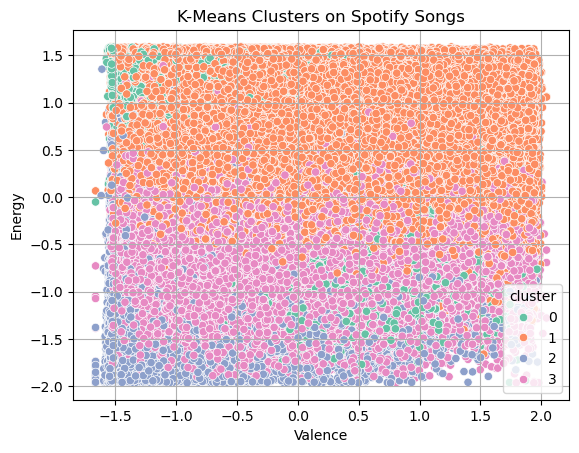

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2D plot using valence and energy
sns.scatterplot(data=df, x='valence', y='energy', hue='cluster', palette='Set2')
plt.title("K-Means Clusters on Spotify Songs")
plt.xlabel("Valence")
plt.ylabel("Energy")
plt.grid(True)
plt.show()

In [14]:
df.groupby('cluster')[audio_features].mean()

,danceability,energy,valence,liveness,acousticness,instrumentalness,speechiness,tempo,loudness
cluster,,,,,,,,,
0,0.142799,0.395715,-0.120701,2.329967,1.016923,-0.547149,3.577418,-0.600960,-0.245499
1,0.398097,0.680870,0.442261,-0.064116,-0.763869,-0.302609,-0.152896,0.262787,0.614524
2,-1.343174,-1.427336,-1.136698,-0.348143,1.211440,1.453619,-0.400995,-0.498193,-1.637043
3,0.001377,-0.667635,-0.182928,-0.207169,0.649107,-0.199706,-0.287028,-0.098563,-0.192082


C:\Users\Anshika saini\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


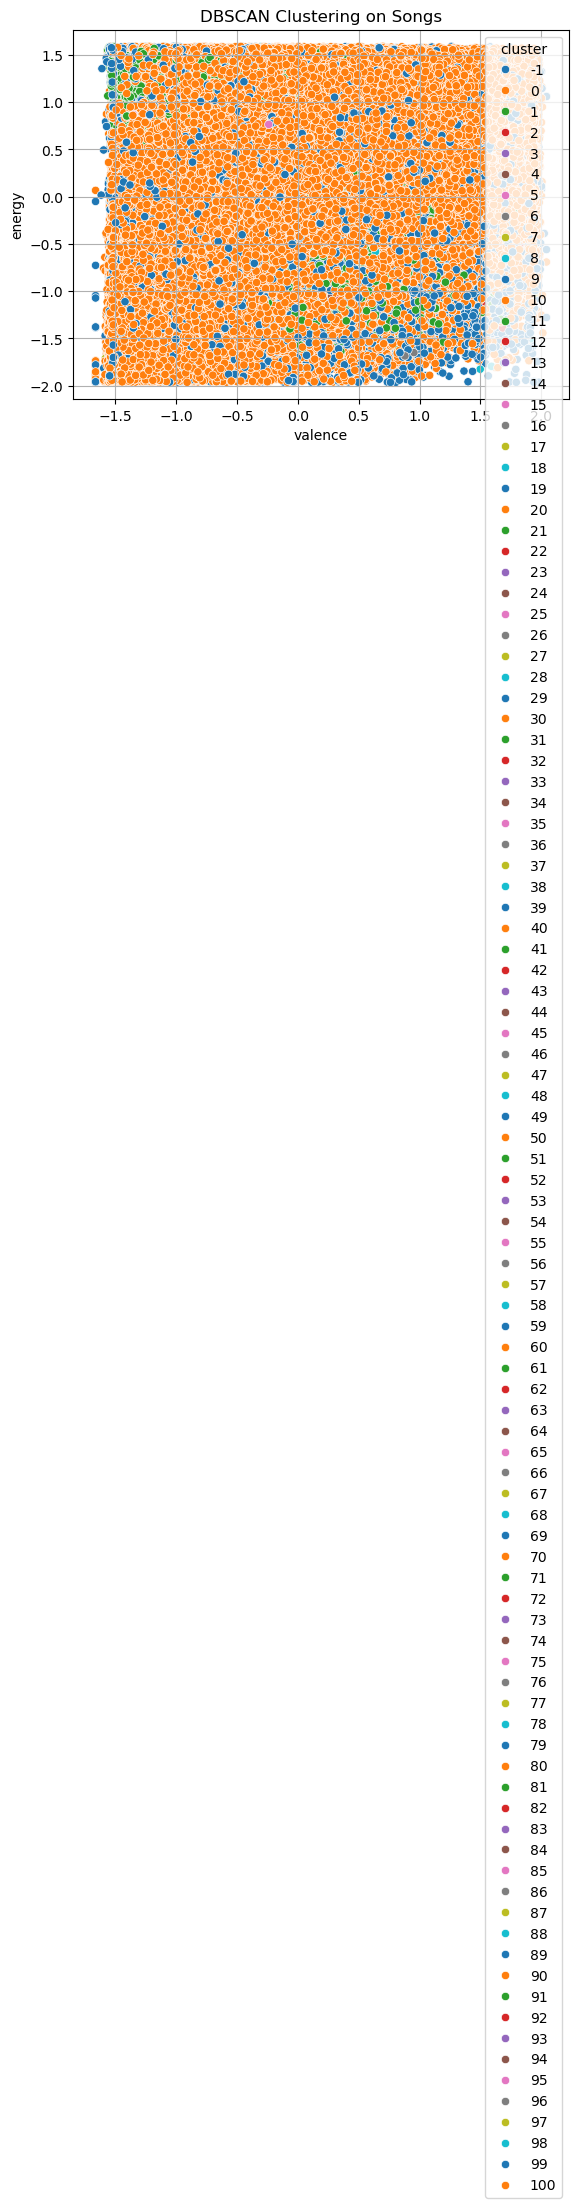

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Use normalized audio features
audio_features = ['danceability', 'energy', 'valence','liveness', 'acousticness',
                  'instrumentalness', 'speechiness', 'tempo', 'loudness']

# 1. Standardize features
X = df[audio_features].values
X = (X - X.mean(axis=0)) / X.std(axis=0)

# 2. Apply DBSCAN
db = DBSCAN(eps=0.7, min_samples=5)  # You may need to tune eps
labels = db.fit_predict(X)

# 3. Store labels
df['cluster'] = labels

# 4. Visualize (e.g., energy vs valence)
sns.scatterplot(data=df, x='valence', y='energy', hue='cluster', palette='tab10')
plt.title("DBSCAN Clustering on Songs")
plt.grid(True)
plt.show()

In [19]:
import numpy as np

# Define the audio feature columns used for similarity
audio_features = ['danceability', 'energy', 'valence','liveness', 'acousticness',
                  'instrumentalness', 'speechiness', 'tempo', 'loudness']

def recommend_song(song_name, artist=None, n_recommendations=5):
    # Step 1: Find the song in the dataset
    if artist:
        song = df[(df['track_name'].str.lower() == song_name.lower()) &
                  (df['artist_name'].str.lower() == artist.lower())]
    else:
        song = df[df['track_name'].str.lower() == song_name.lower()]

    if song.empty:
        return f"❌ Song '{song_name}' not found in dataset."

    song_index = song.index[0]
    song_features = df.loc[song_index, audio_features].values
    song_cluster = df.loc[song_index, 'cluster']

    # Step 2: Filter songs in the same cluster (exclude the target song)
    cluster_songs = df[(df['cluster'] == song_cluster) & (df.index != song_index)].copy()

    # If no other songs in cluster (DBSCAN can cause this), return closest overall
    if cluster_songs.empty:
        cluster_songs = df[df.index != song_index].copy()

    # Step 3: Compute similarity (Euclidean distance)
    cluster_songs['distance'] = cluster_songs[audio_features].apply(
        lambda row: np.linalg.norm(row.values - song_features), axis=1
    )

    # Step 4: Return top N similar songs
    recommendations = cluster_songs.sort_values(by='distance').head(n_recommendations)
    return recommendations[['track_name', 'artist_name', 'distance']]

In [20]:
recommend_song("Son Of Slide", artist="Slave", n_recommendations=5)

,track_name,artist_name,distance
76162,Kings One,Children Songs Company,0.365107
25304,other voices,LCD Soundsystem,0.519541
74984,Nine East - Instrumental,Children Songs Company,0.609375
34757,或真敷一座,Capcom Sound Team,0.648513
25792,Giant,The The,0.648625
